In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import os

In [100]:
#network and training parameters:
EPOCHS = 100 #how many iterations we run the training set
BATCH_SIZE = 128
VERBOSE = 1 #no idea what this is but lets see...
NB_CLASSES = 10 #10 digits
N_HIDDEN = 1000 #number of nodes in hidden layer
VAL_SPLIT = 0.2  #how much of sample is reserved for validation


In [136]:
#first we need to accumulate the data... we start off with a small NN... 2000 samples of global view? 500 from each?
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]
pl_entry=os.scandir('data_red/global')
fps_entry=os.scandir('fps_red/global')
npl_entry=os.scandir('nonpl_data_red/global')
nfps_entry=os.scandir('nonpl_fps_red/global')

i=0
for el in list(pl_entry)[:2200]:
    df=pd.read_csv('data_red/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(i>=500):
        X_test.append(np.array(df['flux'].iloc[0:2000]))
        Y_test.append([1,0,0])
    else:
        X_train.append(np.array(df['flux'].iloc[0:2000]))
        Y_train.append([1,0,0])
    i=i+1
    if(i==600): break

j=0
for el in list(fps_entry)[:2200]:
    df=pd.read_csv('fps_red/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(j>=500):
        X_test.append(np.array(df['flux'].iloc[:2000],dtype='float32'))
        Y_test.append([0,1,0])
    else:
        X_train.append(np.array(df['flux'].iloc[:2000]))
        Y_train.append([0,1,0])
    j=j+1
    if(j==600): break 

k=0
for el in list(npl_entry)[:1500]:
    df=pd.read_csv('nonpl_data_red/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(k>=500):
        X_test.append(np.array(df['flux'].iloc[0:2000]))
        Y_test.append([0,0,1])
    else:
        X_train.append(np.array(df['flux'].iloc[0:2000]))
        Y_train.append([0,0,1])
    k=k+1 
    if(k==600): break

l=0
for el in list(nfps_entry)[0:1500]:
    df=pd.read_csv('nonpl_fps_red/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(l>=500):
       X_test.append(np.array(df['flux'].iloc[:2000]))
       Y_test.append([0,0,1])
    else:
        X_train.append(np.array(df['flux'].iloc[:2000]))
        Y_train.append([0,0,1])
    l=l+1
    if(l==600): break

print(np.array(X_train).shape,np.array(Y_train).shape)
print(np.array(X_test).shape,np.array(Y_test).shape)
np.savetxt('Xtrain.csv', np.array(X_train), delimiter=',')
np.savetxt('Ytrain.csv', np.array(Y_train), delimiter=',')
np.savetxt('Xtest.csv', np.array(X_test), delimiter=',')
np.savetxt('Ytest.csv', np.array(Y_test), delimiter=',')

(2000, 2000) (2000, 3)
(400, 2000) (400, 3)


In [135]:
#got the training set ... now write the neural net
#buid the model
#SGD stochastic gradient descent... 
model = tf.keras.models.Sequential()
DROPOUT=0.3
np.random.seed(1223344)

arr=np.linspace(0,1999,2000,endpoint=True)
print(np.argmin(arr))
print(arr,len(arr))
np.random.shuffle(arr)
X_train=[X_train[int(np.floor(i))] for i in arr]
Y_train=[Y_train[int(np.floor(i))] for i in arr]

arr=np.linspace(0,399,400,endpoint=True)
print(arr,len(arr))
np.random.shuffle(arr)
X_train=[X_test[int(np.floor(i))] for i in arr]
Y_train=[Y_test[int(np.floor(i))] for i in arr]

#add hidden layers
model.add(keras.layers.Dense(256,input_shape=(2000,2000),name='dense_layer',activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(64,input_shape=(2000,256),name='dense_layer_2',activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(3,input_shape=(2000,64),name='dense_layer_3',activation='softmax'))
model.summary()
model.compile(optimizer='SGD', loss='categorical_crossentropy',metrics=['accuracy'])

0
[0.000e+00 1.000e+00 2.000e+00 ... 1.997e+03 1.998e+03 1.999e+03] 2000


IndexError: list index out of range

In [122]:
history=model.fit(np.array(X_train),np.array(Y_train), batch_size=128, epochs=100, verbose=VERBOSE, validation_split=VAL_SPLIT)

Epoch 1/100
3/3 [==============================] - 1s 110ms/step - loss: 1.0978 - accuracy: 0.4656 - val_loss: 1.0953 - val_accuracy: 0.5125
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 1.0943 - accuracy: 0.4969 - val_loss: 1.0917 - val_accuracy: 0.5125
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 1.0909 - accuracy: 0.4938 - val_loss: 1.0882 - val_accuracy: 0.5125
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 1.0868 - accuracy: 0.4969 - val_loss: 1.0848 - val_accuracy: 0.5125
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 1.0842 - accuracy: 0.4969 - val_loss: 1.0820 - val_accuracy: 0.5125
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 1.0818 - accuracy: 0.4969 - val_loss: 1.0795 - val_accuracy: 0.5125
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 1.0795 - accuracy: 0.4969 - val_loss: 1.0767 - val_accuracy: 0.5125
Epoch 8/100
3/3 [==

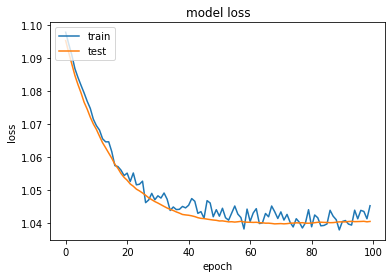

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

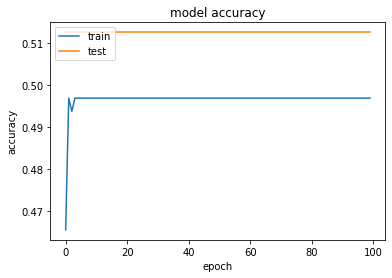

In [124]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [125]:
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(Y_test))
print('Test accuracy:', test_acc)

13/13 [==============================] - 0s 2ms/step - loss: 1.0401 - accuracy: 0.5000
Test accuracy: 0.5
